# 1. Data Cleaning

 Import the libraries

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

Understanding the data set we will be working with

In [20]:
data = pd.read_csv("bank-additional.csv",sep = ';')

In [21]:
data.shape

(4119, 21)

In [22]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


 Numeric and categorical value analysis

In [23]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [24]:
# Display basic info
print(data.info())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [25]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


From the results of ``describe()``, there might be need of scaling for some of the features. For example ``age`` has a mean of 40.11, ranging from 18 to 88 whereas ``euribor3m``has a mean of 3 and it ranges from 0.63 to 5.04. Data scaling is beneficial for models like __Logistic Regression__, __K-nearest Neighbours__ and __Neural Networks__.

In [26]:
print(data.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


No missing values in the data set.

### Exploratory Data Analysis

Output Column

In [27]:
data["y"].describe()

count     4119
unique       2
top         no
freq      3668
Name: y, dtype: object

In [28]:
data["y"].value_counts()

y
no     3668
yes     451
Name: count, dtype: int64

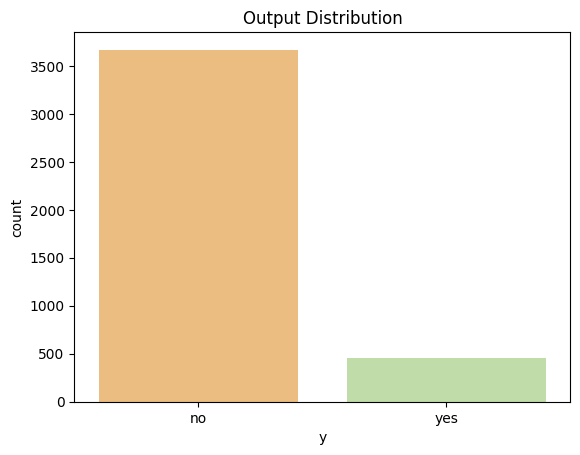

In [29]:
sns.countplot(x = data["y"], palette = "Spectral")
plt.title("Output Distribution")
plt.show()

Age Column

In [30]:
data["age"].describe()

count    4119.000000
mean       40.113620
std        10.313362
min        18.000000
25%        32.000000
50%        38.000000
75%        47.000000
max        88.000000
Name: age, dtype: float64

In [31]:
data["age"].value_counts()

age
32    216
31    191
30    177
34    174
35    172
     ... 
69      2
70      2
85      1
88      1
19      1
Name: count, Length: 67, dtype: int64

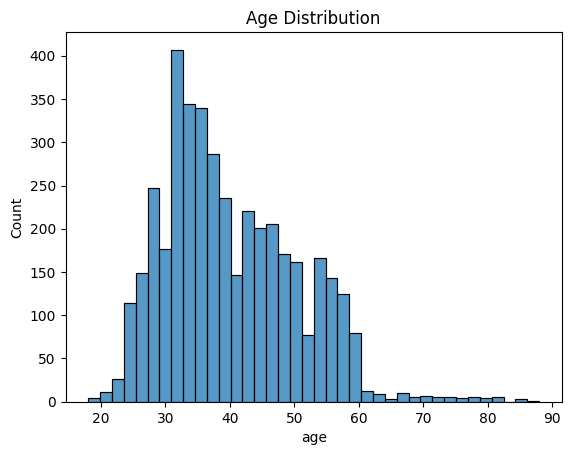

In [32]:
sns.histplot(x = data["age"], palette= "mako")
plt.title("Age Distribution")
plt.show()

Job Column

In [33]:
data["job"].describe()

count       4119
unique        12
top       admin.
freq        1012
Name: job, dtype: object

In [34]:
data["job"].value_counts()

job
admin.           1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
unknown            39
Name: count, dtype: int64

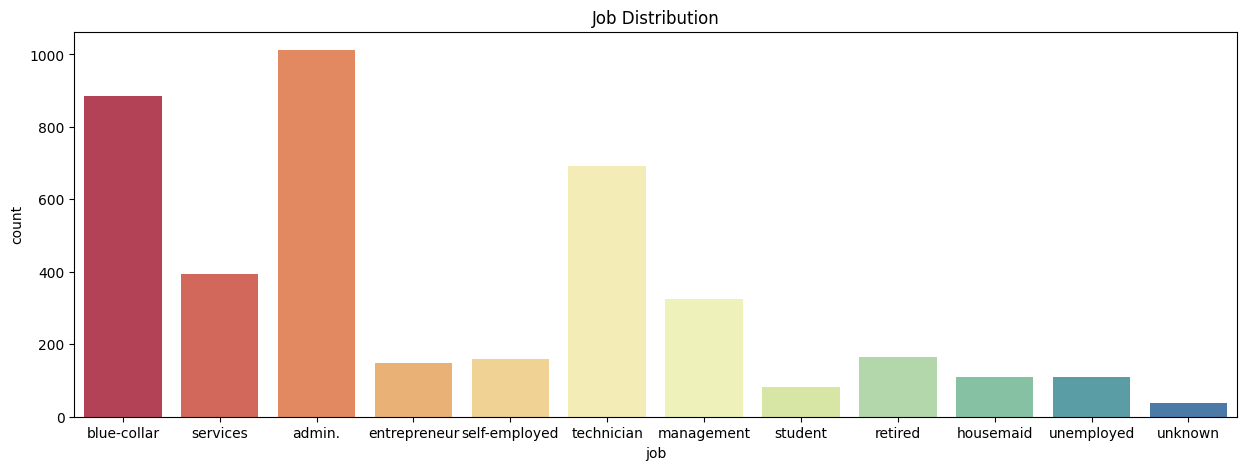

In [35]:
plt.figure(figsize=(15,5))
sns.countplot(x = data["job"], palette= "Spectral")
plt.title("Job Distribution")
plt.show()

Marital Column

In [36]:
data["marital"].describe()

count        4119
unique          4
top       married
freq         2509
Name: marital, dtype: object

In [37]:
data["marital"].value_counts()

marital
married     2509
single      1153
divorced     446
unknown       11
Name: count, dtype: int64

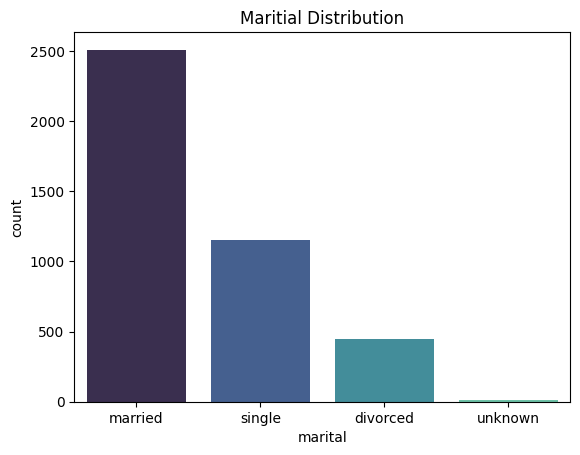

In [38]:
sns.countplot(x = data["marital"], palette= "mako")
plt.title("Maritial Distribution")
plt.show()

Education Column

In [39]:
data["education"].describe()

count                  4119
unique                    8
top       university.degree
freq                   1264
Name: education, dtype: object

In [40]:
data["education"].value_counts()

education
university.degree      1264
high.school             921
basic.9y                574
professional.course     535
basic.4y                429
basic.6y                228
unknown                 167
illiterate                1
Name: count, dtype: int64

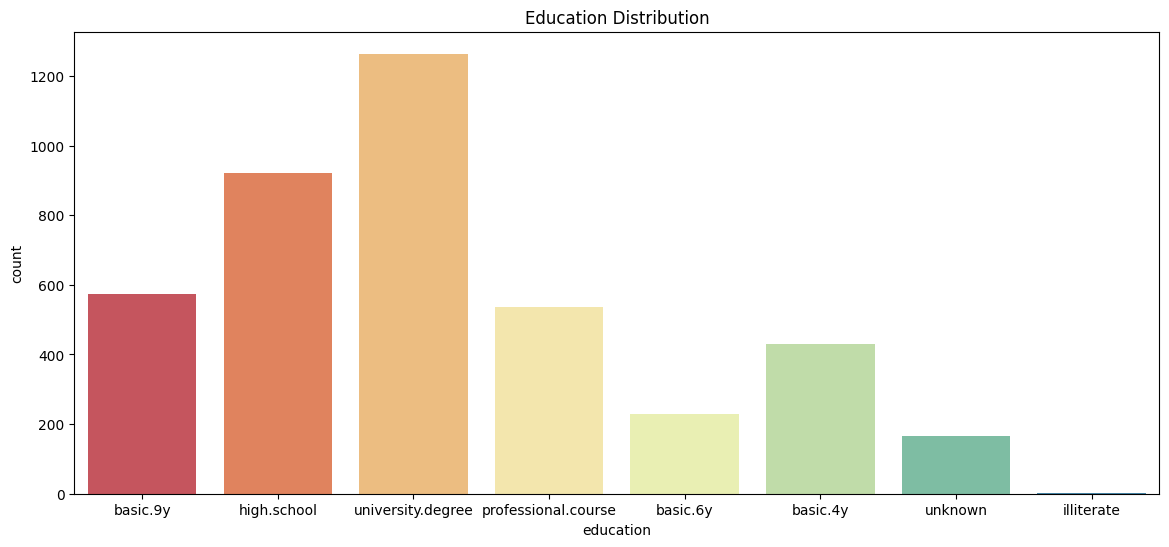

In [41]:
plt.figure(figsize=(14,6))
sns.countplot(x = data["education"], palette= "Spectral")
plt.title("Education Distribution")
plt.show()

Default Column

In [42]:
data["default"].describe()

count     4119
unique       3
top         no
freq      3315
Name: default, dtype: object

In [43]:
data["default"].value_counts()

default
no         3315
unknown     803
yes           1
Name: count, dtype: int64

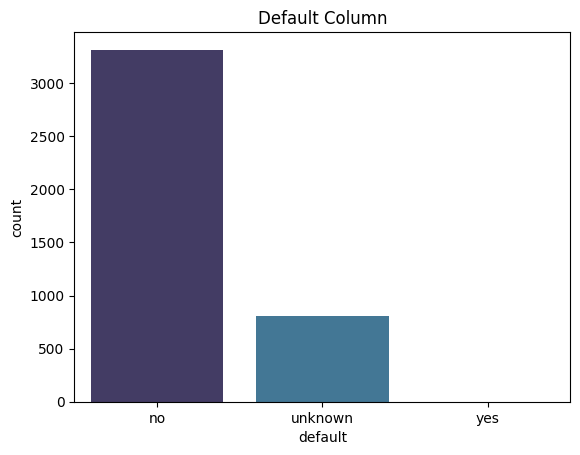

In [44]:
sns.countplot(x = data["default"], palette= "mako")
plt.title("Default Column")
plt.show()

Housing Column

In [45]:
data["housing"].describe()

count     4119
unique       3
top        yes
freq      2175
Name: housing, dtype: object

In [46]:
data["housing"].value_counts()

housing
yes        2175
no         1839
unknown     105
Name: count, dtype: int64

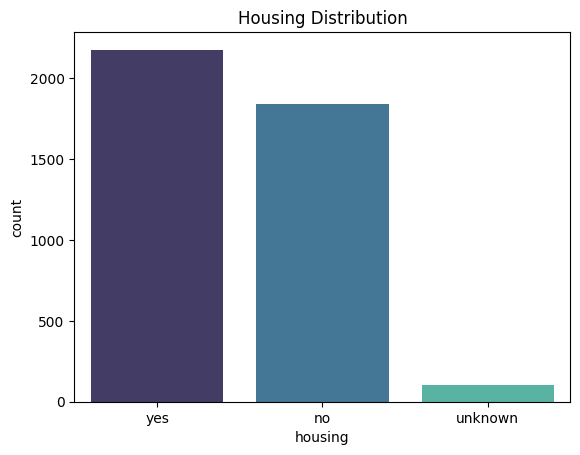

In [47]:
sns.countplot(x = data["housing"], palette= "mako")
plt.title("Housing Distribution")
plt.show()

Loan Column

In [48]:
data["loan"].describe()

count     4119
unique       3
top         no
freq      3349
Name: loan, dtype: object

In [49]:
data["loan"].value_counts()

loan
no         3349
yes         665
unknown     105
Name: count, dtype: int64

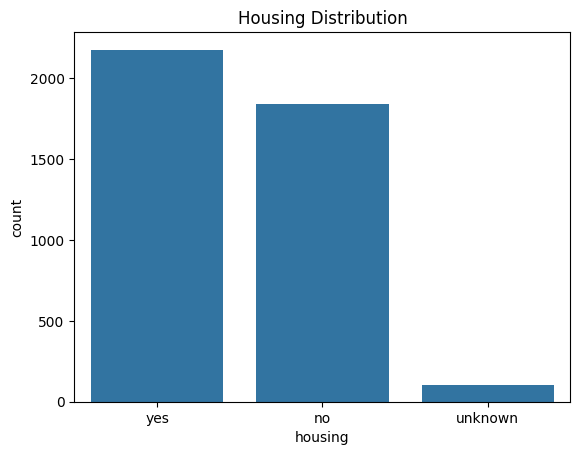

In [50]:
sns.countplot(x = data["housing"])
plt.title("Housing Distribution")
plt.show()

Contact Column

In [51]:
data["contact"].describe()

count         4119
unique           2
top       cellular
freq          2652
Name: contact, dtype: object

In [52]:
data["contact"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4119 entries, 0 to 4118
Series name: contact
Non-Null Count  Dtype 
--------------  ----- 
4119 non-null   object
dtypes: object(1)
memory usage: 32.3+ KB


In [53]:
data["contact"].value_counts()

contact
cellular     2652
telephone    1467
Name: count, dtype: int64

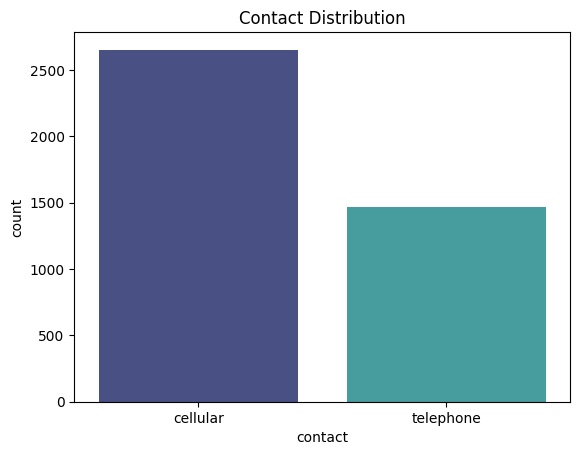

In [54]:
sns.countplot(x = data["contact"], palette = "mako")
plt.title("Contact Distribution")
plt.show()

Month Column

In [55]:
data["month"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4119 entries, 0 to 4118
Series name: month
Non-Null Count  Dtype 
--------------  ----- 
4119 non-null   object
dtypes: object(1)
memory usage: 32.3+ KB


In [56]:
data["month"].describe()

count     4119
unique      10
top        may
freq      1378
Name: month, dtype: object

In [57]:
data["month"].value_counts()

month
may    1378
jul     711
aug     636
jun     530
nov     446
apr     215
oct      69
sep      64
mar      48
dec      22
Name: count, dtype: int64

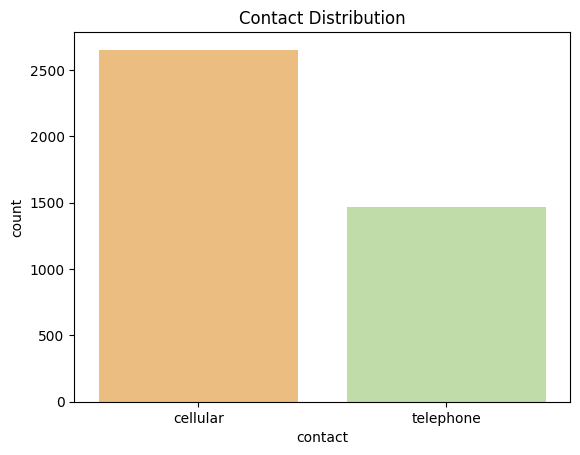

In [58]:
sns.countplot(x = data["contact"], palette = "Spectral")
plt.title("Contact Distribution")
plt.show()

Day_of_week Column

In [59]:
data["day_of_week"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4119 entries, 0 to 4118
Series name: day_of_week
Non-Null Count  Dtype 
--------------  ----- 
4119 non-null   object
dtypes: object(1)
memory usage: 32.3+ KB


In [60]:
data["day_of_week"].describe()

count     4119
unique       5
top        thu
freq       860
Name: day_of_week, dtype: object

In [61]:
data["day_of_week"].value_counts()

day_of_week
thu    860
mon    855
tue    841
wed    795
fri    768
Name: count, dtype: int64

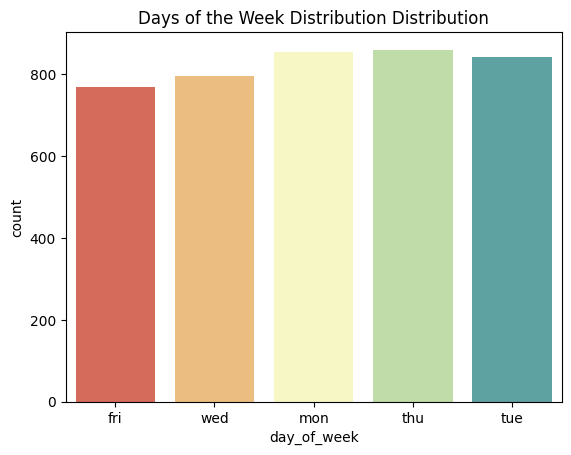

In [62]:
sns.countplot(x = data["day_of_week"], palette = "Spectral")
plt.title("Days of the Week Distribution Distribution")
plt.show()

Duration Column

In [63]:
data["duration"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4119 entries, 0 to 4118
Series name: duration
Non-Null Count  Dtype
--------------  -----
4119 non-null   int64
dtypes: int64(1)
memory usage: 32.3 KB


In [64]:
data["duration"].describe()

count    4119.000000
mean      256.788055
std       254.703736
min         0.000000
25%       103.000000
50%       181.000000
75%       317.000000
max      3643.000000
Name: duration, dtype: float64

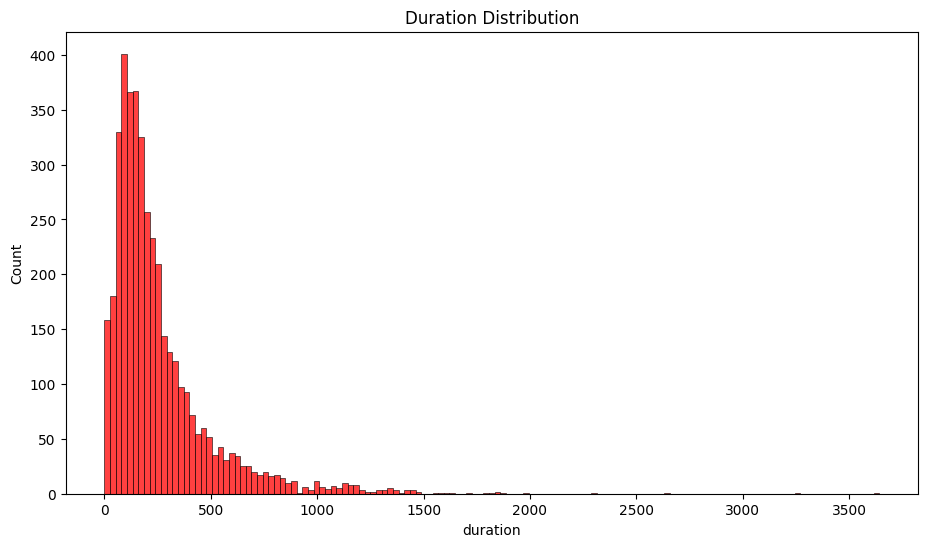

In [65]:
plt.figure(figsize=(11,6))
sns.histplot(x = data["duration"], color = "r")
plt.title("Duration Distribution")
plt.show()

Campaign Column

In [66]:
data["campaign"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4119 entries, 0 to 4118
Series name: campaign
Non-Null Count  Dtype
--------------  -----
4119 non-null   int64
dtypes: int64(1)
memory usage: 32.3 KB


In [67]:
data["campaign"].describe()

count    4119.000000
mean        2.537266
std         2.568159
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        35.000000
Name: campaign, dtype: float64

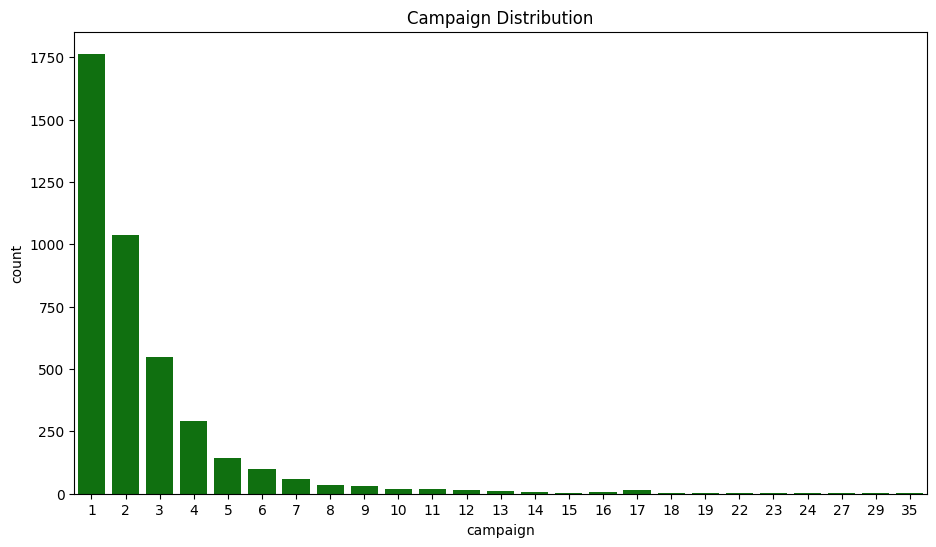

In [68]:
plt.figure(figsize=(11,6))
sns.countplot(x = data["campaign"], color = "g")
plt.title("Campaign Distribution")
plt.show()

Pdays Column

In [69]:
data["pdays"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4119 entries, 0 to 4118
Series name: pdays
Non-Null Count  Dtype
--------------  -----
4119 non-null   int64
dtypes: int64(1)
memory usage: 32.3 KB


In [70]:
data["pdays"].describe()

count    4119.000000
mean      960.422190
std       191.922786
min         0.000000
25%       999.000000
50%       999.000000
75%       999.000000
max       999.000000
Name: pdays, dtype: float64

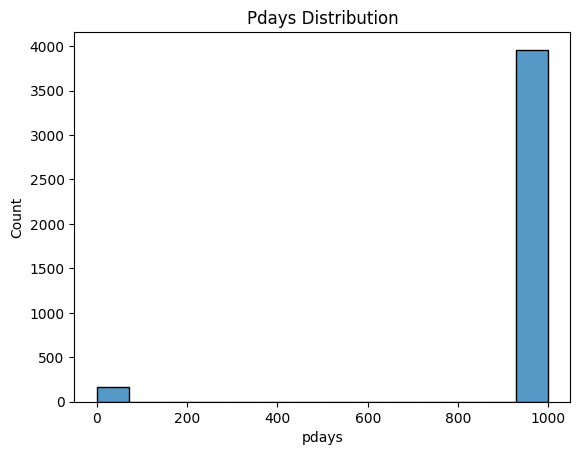

In [71]:
sns.histplot(x = data["pdays"], palette = "coolwarm")
plt.title("Pdays Distribution")
plt.show()

Previous Column

In [72]:
data["previous"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4119 entries, 0 to 4118
Series name: previous
Non-Null Count  Dtype
--------------  -----
4119 non-null   int64
dtypes: int64(1)
memory usage: 32.3 KB


In [73]:
data["previous"].describe()

count    4119.000000
mean        0.190337
std         0.541788
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         6.000000
Name: previous, dtype: float64

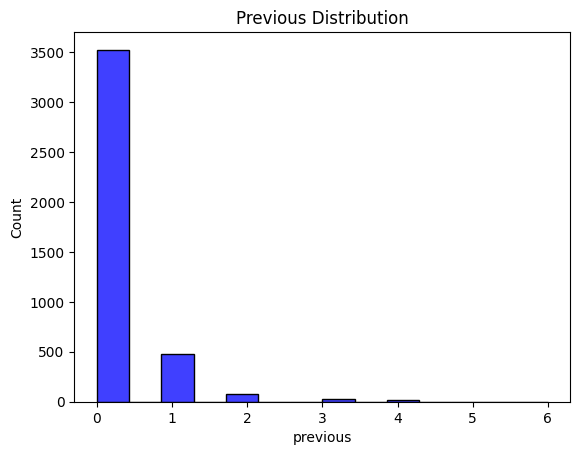

In [74]:
sns.histplot(x = data["previous"], color = "b")
plt.title("Previous Distribution")
plt.show()

Poutcome Column

In [75]:
data["poutcome"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4119 entries, 0 to 4118
Series name: poutcome
Non-Null Count  Dtype 
--------------  ----- 
4119 non-null   object
dtypes: object(1)
memory usage: 32.3+ KB


In [76]:
data["poutcome"].describe()

count            4119
unique              3
top       nonexistent
freq             3523
Name: poutcome, dtype: object

In [77]:
data["poutcome"].value_counts()

poutcome
nonexistent    3523
failure         454
success         142
Name: count, dtype: int64

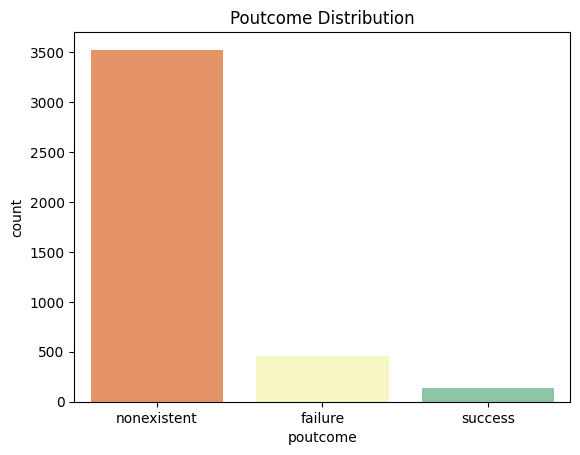

In [78]:
sns.countplot(x = data["poutcome"], palette = "Spectral")
plt.title("Poutcome Distribution")
plt.show()

Employee Variance Rate

In [79]:
data["emp.var.rate"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4119 entries, 0 to 4118
Series name: emp.var.rate
Non-Null Count  Dtype  
--------------  -----  
4119 non-null   float64
dtypes: float64(1)
memory usage: 32.3 KB


In [80]:
data["emp.var.rate"].describe()

count    4119.000000
mean        0.084972
std         1.563114
min        -3.400000
25%        -1.800000
50%         1.100000
75%         1.400000
max         1.400000
Name: emp.var.rate, dtype: float64

In [81]:
data["emp.var.rate"].nunique()

10

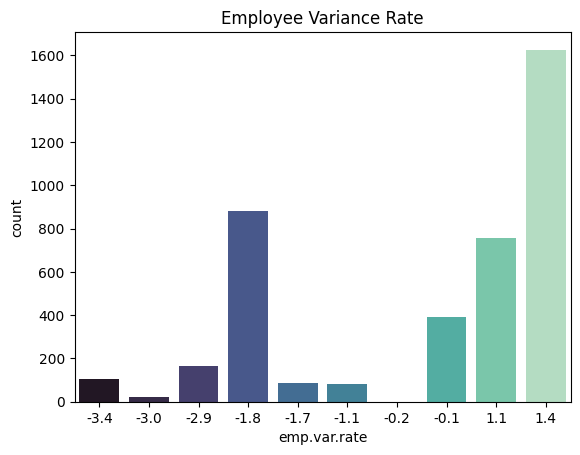

In [82]:
sns.countplot(x = data["emp.var.rate"], palette = "mako")
plt.title("Employee Variance Rate")
plt.show()

Cons.price.idx Column

In [83]:
data["cons.price.idx"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4119 entries, 0 to 4118
Series name: cons.price.idx
Non-Null Count  Dtype  
--------------  -----  
4119 non-null   float64
dtypes: float64(1)
memory usage: 32.3 KB


In [84]:
data["cons.price.idx"].describe()

count    4119.000000
mean       93.579704
std         0.579349
min        92.201000
25%        93.075000
50%        93.749000
75%        93.994000
max        94.767000
Name: cons.price.idx, dtype: float64

In [85]:
data["cons.price.idx"].nunique()

26

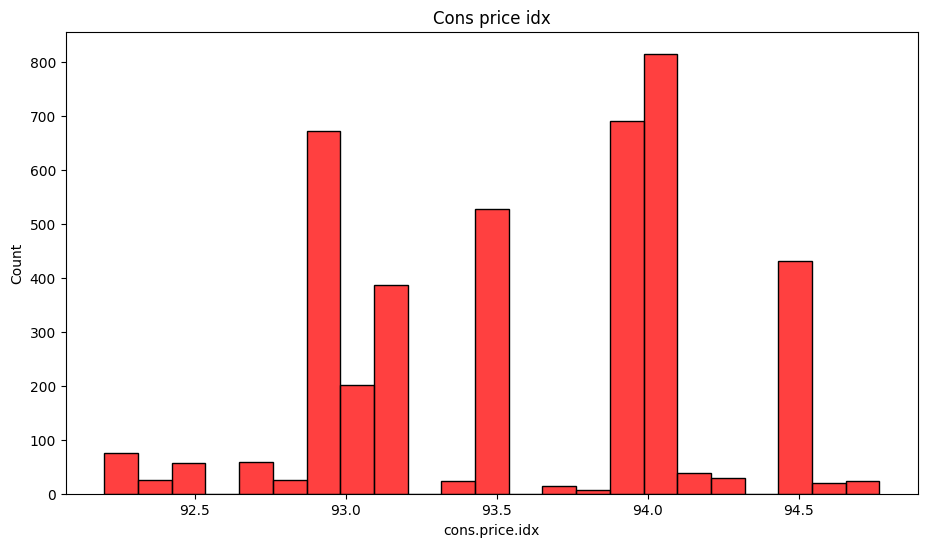

In [86]:
plt.figure(figsize=(11,6))
sns.histplot(x = data["cons.price.idx"], color = "r")
plt.title("Cons price idx")
plt.show()

Cons.conf.idx Column

In [87]:
data["cons.conf.idx"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4119 entries, 0 to 4118
Series name: cons.conf.idx
Non-Null Count  Dtype  
--------------  -----  
4119 non-null   float64
dtypes: float64(1)
memory usage: 32.3 KB


In [88]:
data["cons.conf.idx"].describe()

count    4119.000000
mean      -40.499102
std         4.594578
min       -50.800000
25%       -42.700000
50%       -41.800000
75%       -36.400000
max       -26.900000
Name: cons.conf.idx, dtype: float64

In [89]:
data["cons.conf.idx"].nunique()

26

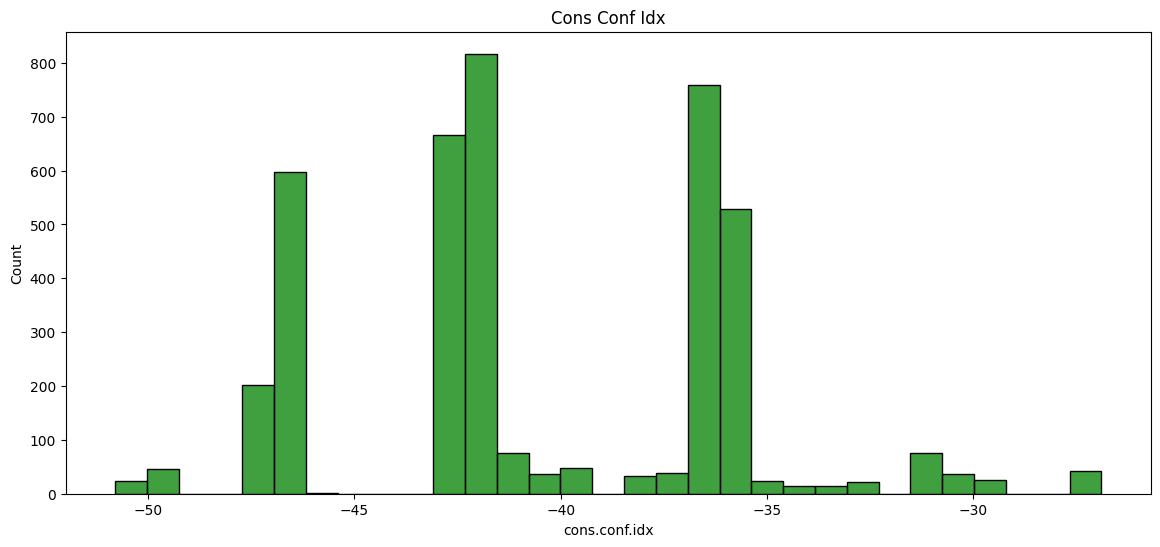

In [90]:
plt.figure(figsize=(14,6))
sns.histplot(x = data["cons.conf.idx"], color = "g")
plt.title("Cons Conf Idx")
plt.show()

Euribor3m Column

In [91]:
data["euribor3m"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4119 entries, 0 to 4118
Series name: euribor3m
Non-Null Count  Dtype  
--------------  -----  
4119 non-null   float64
dtypes: float64(1)
memory usage: 32.3 KB


In [92]:
data["euribor3m"].describe()

count    4119.000000
mean        3.621356
std         1.733591
min         0.635000
25%         1.334000
50%         4.857000
75%         4.961000
max         5.045000
Name: euribor3m, dtype: float64

In [93]:
len(data["euribor3m"])

4119

In [94]:
data["euribor3m"].nunique()

234

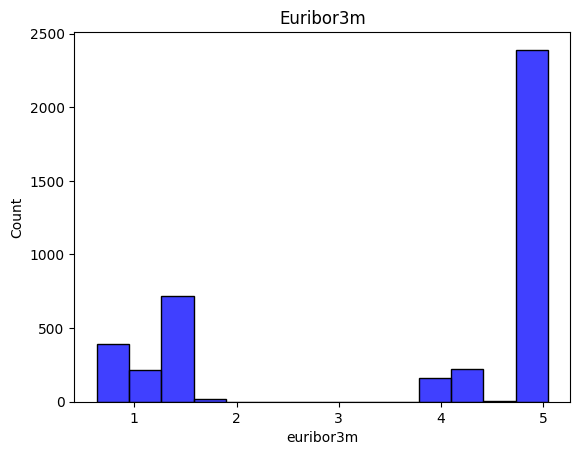

In [95]:
sns.histplot(x = data["euribor3m"], color = "b")
plt.title("Euribor3m")
plt.show()


Nr Employed Column

In [96]:
data["nr.employed"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4119 entries, 0 to 4118
Series name: nr.employed
Non-Null Count  Dtype  
--------------  -----  
4119 non-null   float64
dtypes: float64(1)
memory usage: 32.3 KB


In [97]:
data["nr.employed"].describe()

count    4119.000000
mean     5166.481695
std        73.667904
min      4963.600000
25%      5099.100000
50%      5191.000000
75%      5228.100000
max      5228.100000
Name: nr.employed, dtype: float64

In [98]:
data["nr.employed"].nunique()

11

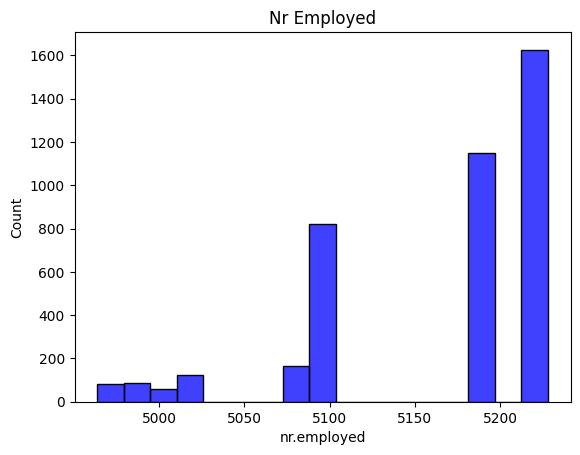

In [99]:
sns.histplot(x = data["nr.employed"], color = "b")
plt.title("Nr Employed")
plt.show()

Correlation Matrix

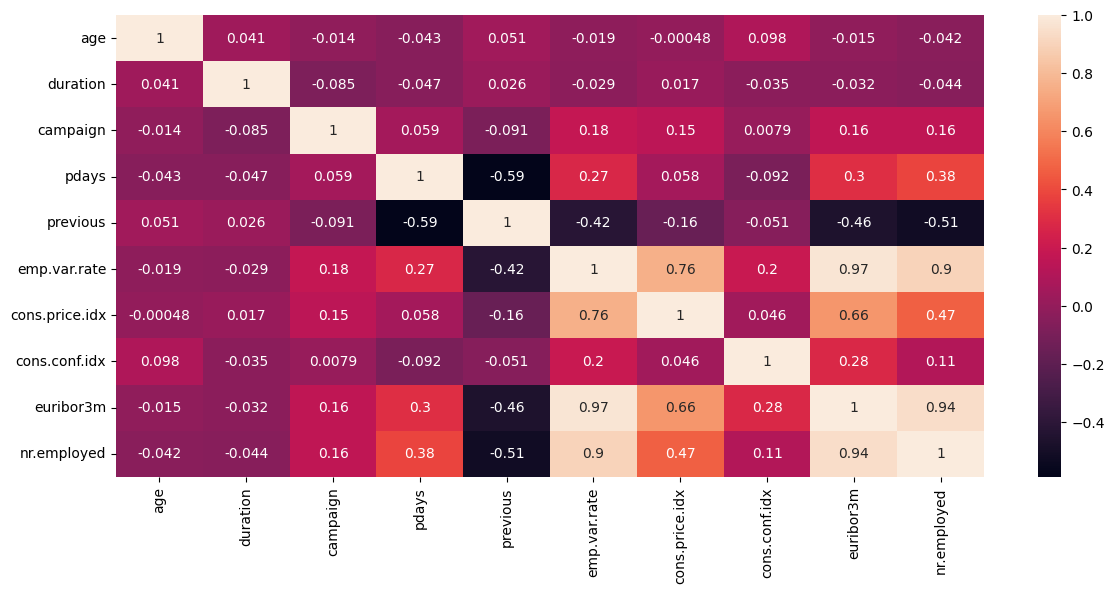

In [100]:
numeric_data = data.select_dtypes(include=[float, int])
plt.figure(figsize=(14,6))
sns.heatmap(numeric_data.corr(),annot=True)
plt.show()

# 2. Data Preprocessing

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [103]:
data.nunique()

age                67
job                12
marital             4
education           8
default             3
housing             3
loan                3
contact             2
month              10
day_of_week         5
duration          828
campaign           25
pdays              21
previous            7
poutcome            3
emp.var.rate       10
cons.price.idx     26
cons.conf.idx      26
euribor3m         234
nr.employed        11
y                   2
dtype: int64

 Dropping ``duration`` to have a realistic predictive model as it highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known.

In [104]:
data = data.drop('duration', axis=1)

In [105]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

In [106]:
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month',
                      'day_of_week', 'poutcome', "y"]

In [107]:
# Apply LabelEncoder to each categorical column
for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

# Now data has all categorical columns label encoded

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   int32  
 2   marital         4119 non-null   int32  
 3   education       4119 non-null   int32  
 4   default         4119 non-null   int32  
 5   housing         4119 non-null   int32  
 6   loan            4119 non-null   int32  
 7   contact         4119 non-null   int32  
 8   month           4119 non-null   int32  
 9   day_of_week     4119 non-null   int32  
 10  campaign        4119 non-null   int64  
 11  pdays           4119 non-null   int64  
 12  previous        4119 non-null   int64  
 13  poutcome        4119 non-null   int32  
 14  emp.var.rate    4119 non-null   float64
 15  cons.price.idx  4119 non-null   float64
 16  cons.conf.idx   4119 non-null   float64
 17  euribor3m       4119 non-null   f

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


In [110]:
# Separate features and target variable
X = data.drop(columns=['y'])
y = data['y']

In [111]:
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [112]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

In [113]:
# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

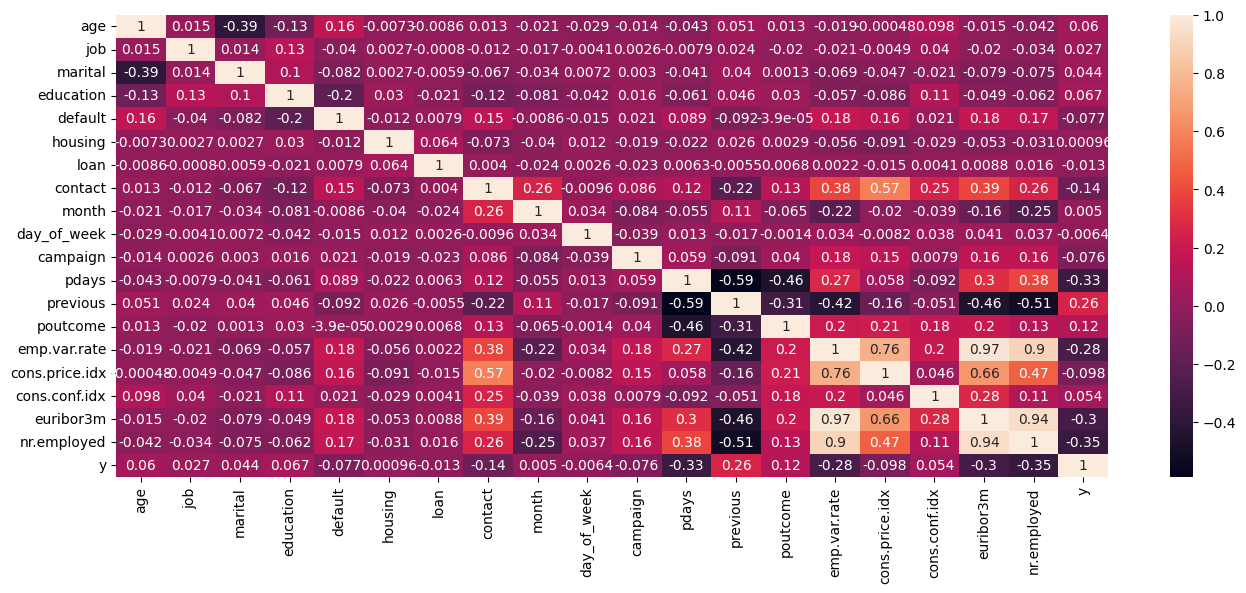

In [ ]:
plt.figure(figsize=(16,6))
sns.heatmap(data.corr(),annot=True)
plt.show()

# 3. Feature Selection

In [27]:
from sklearn.feature_selection import SelectKBest, f_classif

In [28]:
# Select top 15 features using ANOVA F-value
selector = SelectKBest(score_func=f_classif, k=15)
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

X_train_selected = selector.fit_transform(X_train_preprocessed, y_train)
X_test_selected = selector.transform(X_test_preprocessed)

In [29]:
# Get selected feature names
feature_names = preprocessor.get_feature_names_out()
selected_features = feature_names[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: ['num__age' 'num__campaign' 'num__pdays' 'num__previous'
 'num__emp.var.rate' 'num__cons.price.idx' 'num__cons.conf.idx'
 'num__euribor3m' 'num__nr.employed']


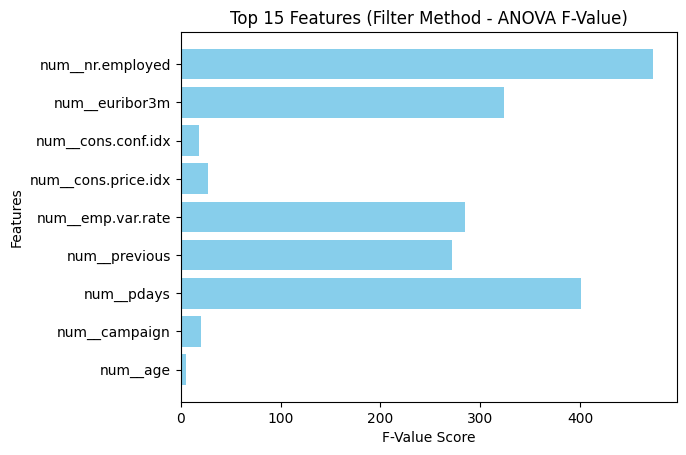

In [30]:
# Visualize selected features
scores = selector.scores_[selector.get_support()]
plt.barh(selected_features, scores, color='skyblue')
plt.title("Top 15 Features (Filter Method - ANOVA F-Value)")
plt.xlabel("F-Value Score")
plt.ylabel("Features")
plt.show()

# 4. Model Selection

In [127]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, mean_squared_error
import numpy as np

### Model selection: Comparing the performances of LogisticRegression, LogisticRegression, XGBClassifier, RandomForestClassifier

In [130]:
# Models to evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42,n_jobs=-1),
    "Random Forest": RandomForestClassifier(random_state=42)
}

In [131]:
# Evaluate models using a unified pipeline
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),        # Preprocessing step
        ('feature_selector', SelectKBest(score_func=f_classif, k=15)),  # Feature selection step
        ('classifier', model)                 # Classification model step
    ])
    
    # Fit pipeline and predict on the test set
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1]
    
    # Metrics
    train_score = pipeline.score(X_train, y_train)
    test_score = pipeline.score(X_test, y_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    auc = roc_auc_score(y_test, y_proba)
    
    print(f"Model: {name}")
    print(f"Training Score: {train_score:.3f}")
    print(f"Test Score: {test_score:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print(f"ROC-AUC: {auc:.3f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("-" * 50)

ValueError: A given column is not a column of the dataframe

### Choosing the Final Model From the example table above:

Random Forest has the highest ROC-AUC (0.750) and a low RMSE (0.323). It balances the training and test scores well, indicating no significant overfitting. It achieves a strong F1-score (0.90) for the subscribed class, making it well-suited for an imbalanced classification problem. Thus, Random Forest would be the final model.

### Custom Label Encoder and Features Adder classes for Pipeline

In [346]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [347]:
class CustomLabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, categorical_columns):
        self.categorical_columns = categorical_columns
        self.encoders = None
    
    def fit(self, X, y=None):
        self.encoders = {
            col: LabelEncoder().fit(X[col].astype(str))
            for col in self.categorical_columns
        }
        print("Fitting Label Encoders")
        return self
    
    def transform(self, X, y=None):
        X_new = X.copy()
        for col, le in self.encoders.items():
            original_classes = list(le.classes_)
            X_new[col] = X_new[col].map(lambda s: 'unknown' if s not in le.classes_ else s).astype(str)
            le.classes_ = np.append(le.classes_, 'unknown')
            X_new[col] = le.transform(X_new[col])
        return X_new

In [348]:
class CustomFeaturesAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        print("Fitting Custom Features Adder")
        return self
    
    def transform(self, X, y=None):
        X_new = X.copy()
        X_new['previous_contact'] = (X_new['pdays'] != 999).astype(int)
        X_new.loc[X_new["previous_contact"] == 0, "pdays"] = -1
        X_new["unemployed"] = X_new["job"].isin(["student", "retired", "unemployed"]).astype(int)
        
        return X_new

# 5. Hyperparameter Tuning using  (GridSearchCV)

In [350]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, roc_auc_score, mean_squared_error, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [351]:
# Hyperparameter grid for Random Forest
rf_param_grid = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Create the pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing step
    ('feature_selector', SelectKBest(score_func=f_classif, k=15)),  # Feature selection step
    ('classifier', RandomForestClassifier(random_state=42))  # Random Forest model
])

In [352]:
# Perform GridSearchCV for Random Forest
rf_grid_search = GridSearchCV(rf_pipeline, param_grid=rf_param_grid, cv=3, scoring='roc_auc', verbose=2)
rf_grid_search.fit(X_train, y_train)

# Retrieve the best estimator and parameters
best_rf_pipeline = rf_grid_search.best_estimator_
print("Best Parameters for Random Forest:", rf_grid_search.best_params_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.3s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.1s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.1s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.3s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.2s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.2s
[CV] END classifier__max_depth=Non

# 7. Evaluation

In [356]:
from sklearn.metrics import classification_report, roc_auc_score, mean_squared_error, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [357]:
# Predict using the best Random Forest model
y_pred_rf = best_rf_pipeline.predict(X_test)
y_proba_rf = best_rf_pipeline.predict_proba(X_test)[:, 1]

# Metrics
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       734
           1       0.62      0.17      0.26        90

    accuracy                           0.90       824
   macro avg       0.77      0.58      0.60       824
weighted avg       0.88      0.90      0.87       824

ROC-AUC Score: 0.7637980623675447
RMSE: 0.3192831777166087


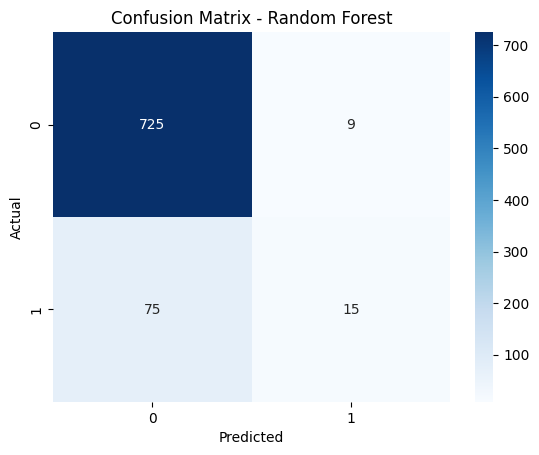

In [358]:
# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

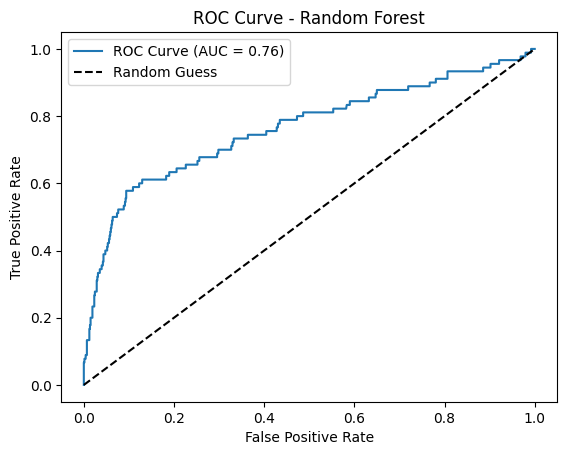

In [359]:

# ROC Curve
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_proba_rf)
plt.plot(fpr_rf, tpr_rf, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_proba_rf):.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

### Finalize the selected model by encapsulating with Pipeline

In [360]:
# Finalize the pipeline with the best Random Forest model
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing step
    ('feature_selector', SelectKBest(score_func=f_classif, k=15)),  # Feature selection step
    ('classifier', best_rf_pipeline.named_steps['classifier'])  # Final Random Forest model
])

# Fit the finalized pipeline on the entire training data
final_pipeline.fit(X_train, y_train)

# Test the pipeline on unseen data
final_predictions = final_pipeline.predict(X_test)
final_probabilities = final_pipeline.predict_proba(X_test)[:, 1]

print("Final Model Performance")
print("Classification Report:\n", classification_report(y_test, final_predictions))
print("ROC-AUC Score:", roc_auc_score(y_test, final_probabilities))


Final Model Performance
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       734
           1       0.62      0.17      0.26        90

    accuracy                           0.90       824
   macro avg       0.77      0.58      0.60       824
weighted avg       0.88      0.90      0.87       824

ROC-AUC Score: 0.7637980623675447


### Feature Importance

Feature Importance:
            Feature  Importance
13       euribor3m    0.197171
0              age    0.129196
14     nr.employed    0.124296
9         poutcome    0.066504
1              job    0.066378
7            pdays    0.060889
12   cons.conf.idx    0.058632
3        education    0.056635
6         campaign    0.050941
11  cons.price.idx    0.050603
10    emp.var.rate    0.043488
2          marital    0.035927
8         previous    0.032581
5          contact    0.018256
4          default    0.008504


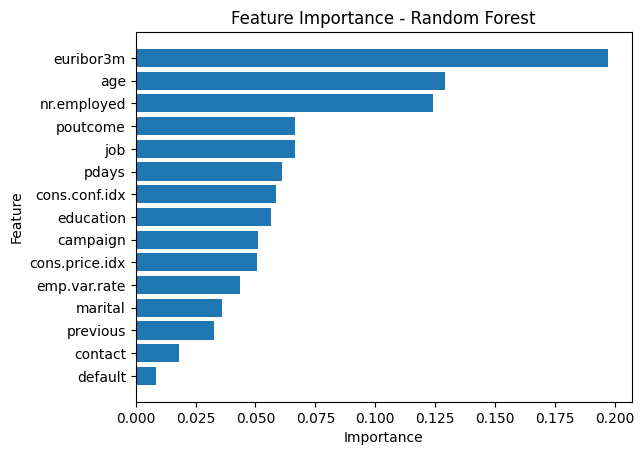

In [361]:
# Extract feature importance from the Random Forest model
import pandas as pd

feature_selector = final_pipeline.named_steps['feature_selector']
classifier = final_pipeline.named_steps['classifier']

# Map selected features to their importance
selected_features = feature_selector.get_support(indices=True)
feature_names = X_train.columns[selected_features]
feature_importance = classifier.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Display the feature importance
print("Feature Importance:\n", importance_df)

# Plot the feature importance
import matplotlib.pyplot as plt

plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance - Random Forest")
plt.gca().invert_yaxis()  # Flip the chart for better readability
plt.show()


### Saving the model using ``pickle``

In [362]:
import pickle
import pkg_resources
import types

# Save the finalized pipeline
filename = 'bank_marketing_pipeline.sav'
pickle.dump(best_rf_pipeline, open(filename, 'wb'))
print(f"Model saved as '{filename}'")

# Extract dependencies for the project
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            name = val.__name__.split(".")[0]  # Get root package
        elif isinstance(val, type):
            name = val.__module__.split(".")[0]
            
        poorly_named_packages = {
            "PIL": "Pillow",
            "sklearn": "scikit-learn"
        }
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]
            
        yield name

# Get list of imported packages
imports = list(set(get_imports()))

# Match imported packages with installed versions
requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name != "pip":  # Exclude pip
        requirements.append((m.project_name, m.version))

# Print dependencies in requirements.txt format
print("\nGenerated dependencies:")
for r in requirements:
    print("{}=={}".format(*r))


Model saved as 'bank_marketing_pipeline.sav'

Generated dependencies:
matplotlib==3.10.0
numpy==1.26.4
pandas==2.2.3
seaborn==0.13.2
xgboost==2.1.3
scikit-learn==1.4.2
